In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Explore data
print(df.head())
print(df.info())

# Encode categorical column
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

# Check duplicates & missing values
print(df.duplicated().sum())
print(df.isnull().sum())

# Scale features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
0
CustomerID                0
Gender               

2. Dimensionality Reduction (PCA + t-SNE)

Explained variance by components: [0.33690046 0.26230645]


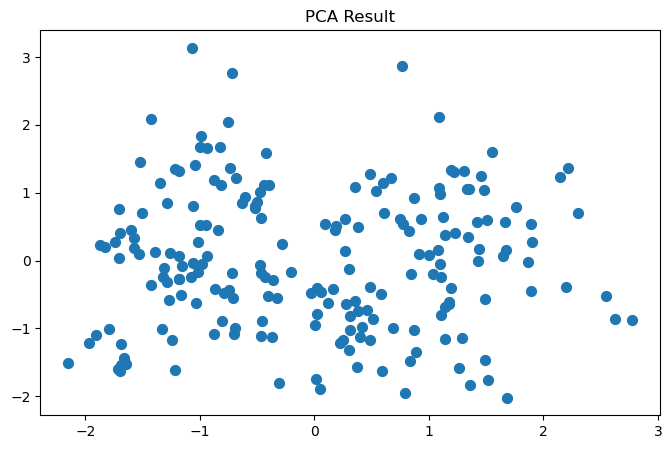

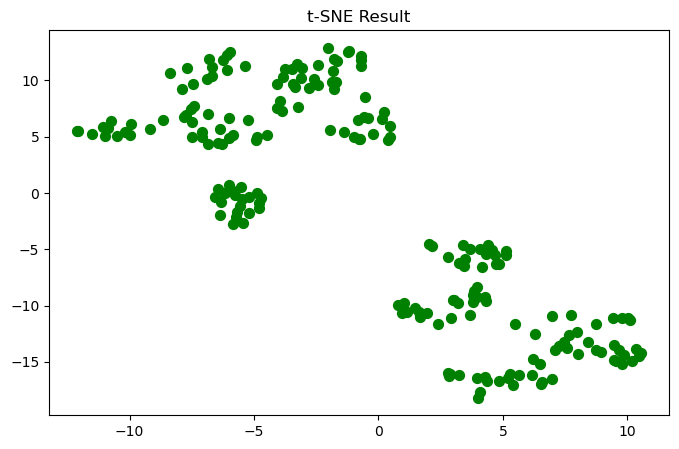

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print(f'Explained variance by components: {pca.explained_variance_ratio_}')
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50)
plt.title("PCA Result")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(8, 5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, c='green')
plt.title("t-SNE Result")
plt.show()


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

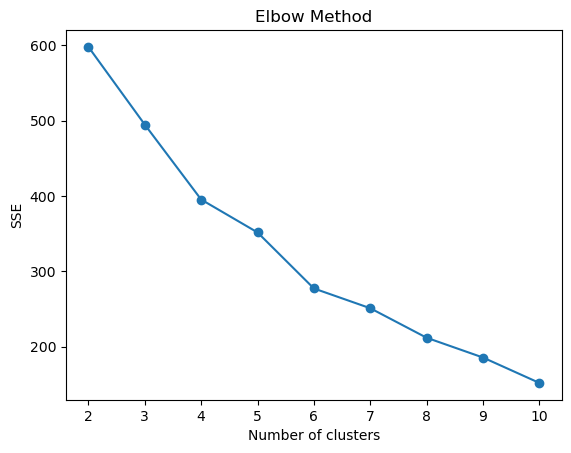

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


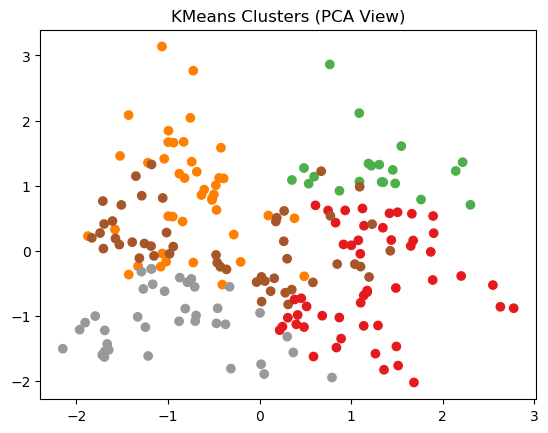

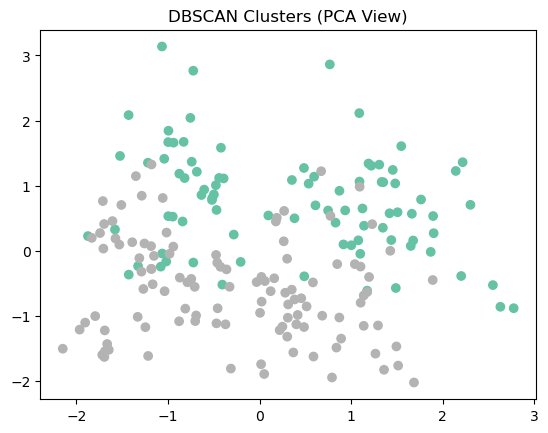

In [6]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans clustering
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# Optimal K=5
kmeans = KMeans(n_clusters=5, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=k_labels, cmap='Set1')
plt.title("KMeans Clusters (PCA View)")
plt.show()

# DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=db_labels, cmap='Set2')
plt.title("DBSCAN Clusters (PCA View)")
plt.show()


In [8]:
print("KMeans Silhouette Score:", silhouette_score(scaled_data, k_labels))
print("KMeans Davies-Bouldin Score:", davies_bouldin_score(scaled_data, k_labels))

print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, db_labels))
print("DBSCAN Davies-Bouldin Score:", davies_bouldin_score(scaled_data, db_labels))


KMeans Silhouette Score: 0.27191023466188324
KMeans Davies-Bouldin Score: 1.181091452406171
DBSCAN Silhouette Score: 0.2776035125578272
DBSCAN Davies-Bouldin Score: 1.6116938570457684
